# Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for data visualisation
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, ttest_ind

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top50spotify2019/top50.csv


# Preparation

In [2]:
# Importing data to pandas dataframe
filename='/kaggle/input/top50spotify2019/top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1', index_col = 0)
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Check the number of rows and column from the dataset

In [3]:
print(df.shape)

(50, 13)


The not a number variable can be used to class identifier, and the number type variable can be used to determine which class the track is in.
The variable used to determine which class the track in this analysis is the Genre variable.

In [4]:
print(df.dtypes)

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object


Changing column name to more easy typed name

In [5]:
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Genre':'genre','Beats.Per.Minute':'bpm','Energy':'energy','Danceability':'danceability','Loudness..dB..':'loudness','Liveness':'liveness','Valence.':'valence','Length.':'length', 'Acousticness..':'acousticness','Speechiness.':'speechiness','Popularity':'popularity'},inplace=True)
df.head()

,track_name,artist_name,genre,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Check Empty Record
If there is empty record from the data entries within the dataset, that empty record will filled with 0 value to avoid unnecessary error in further analysis.

In [6]:
df.isnull().sum()
df.fillna(0)

,track_name,artist_name,genre,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


# Arithmetic analysis from the number type variable

In [7]:
pd.set_option('precision', 2)
df.describe()

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,120.06,64.06,71.38,-5.66,14.66,54.60,200.96,22.16,12.48,87.50
std,30.90,14.23,11.93,2.06,11.12,22.34,39.14,19.00,11.16,4.49
min,85.00,32.00,29.00,-11.00,5.00,10.00,115.00,1.00,3.00,70.00
25%,96.00,55.25,67.00,-6.75,8.00,38.25,176.75,8.25,5.00,86.00
50%,104.50,66.50,73.50,-6.00,11.00,55.50,198.00,15.00,7.00,88.00
75%,137.50,74.75,79.75,-4.00,15.75,69.50,217.50,33.75,15.00,90.75
max,190.00,88.00,90.00,-2.00,58.00,95.00,309.00,75.00,46.00,95.00


# Data Visualisation

Viewing the most popular Genre based on the song / track count from the dataset

Text(0.5, 1.0, 'Genre vs Songs')

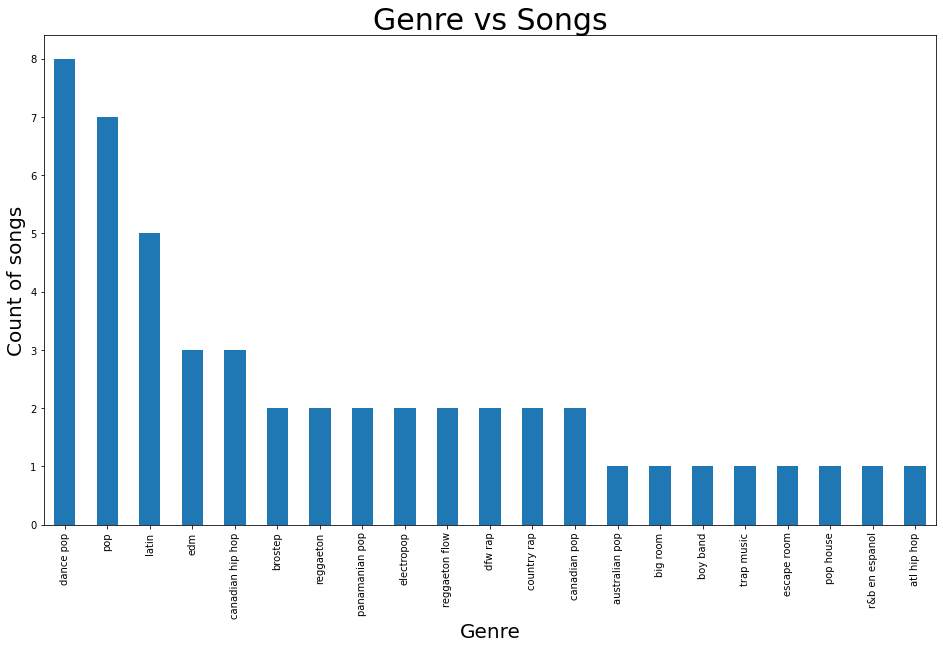

In [8]:
fig = plt.figure(figsize = (16,9))
df.groupby('genre')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Genre vs Songs', fontsize = 30)

Viewing the most popular Artist based on the song / track count from the dataset

Text(0.5, 1.0, 'Artist vs Songs')

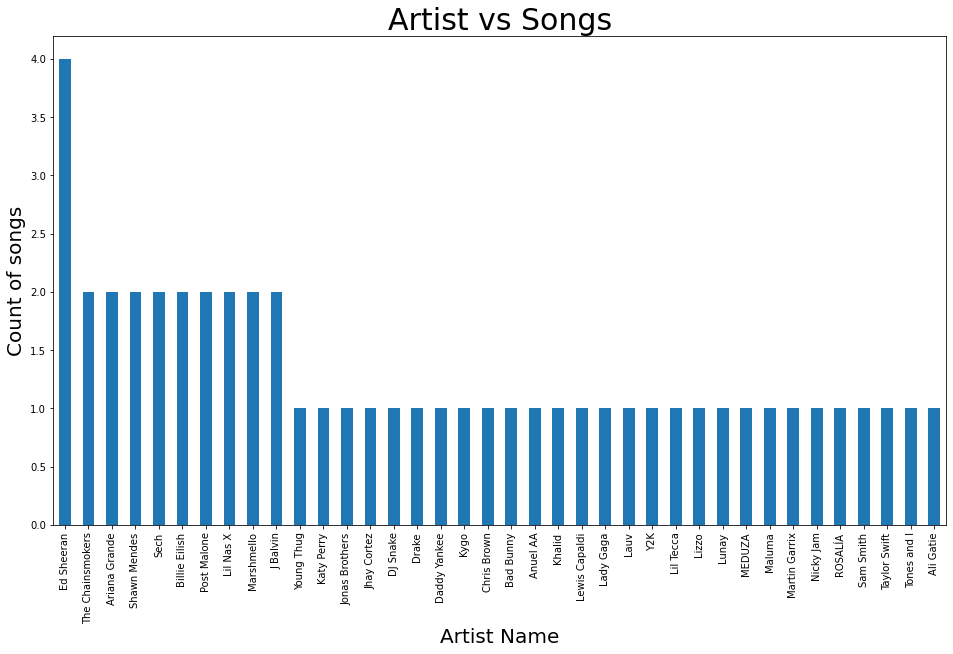

In [9]:
fig = plt.figure(figsize = (16,9))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist vs Songs', fontsize = 30)

# Correlation among the variable

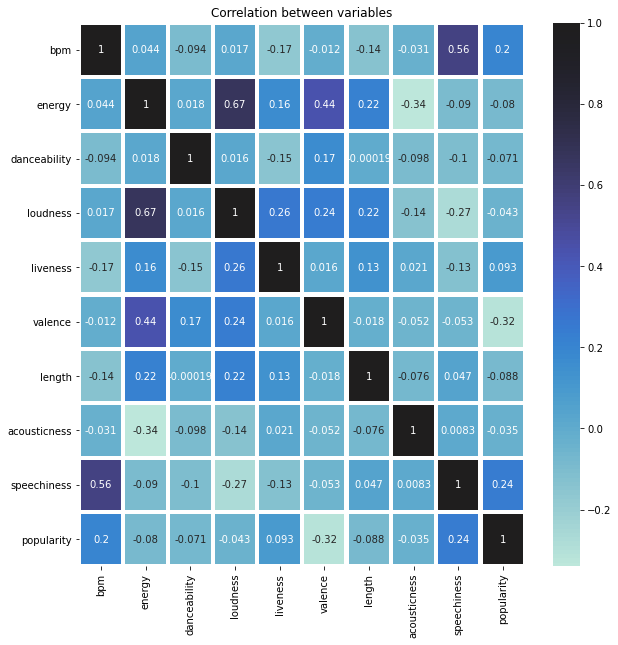

In [10]:
plt.figure(figsize=(10,10))
plt.title('Correlation between variables')
sns.heatmap(df.corr(),linewidth=3.1,annot=True,center=1)

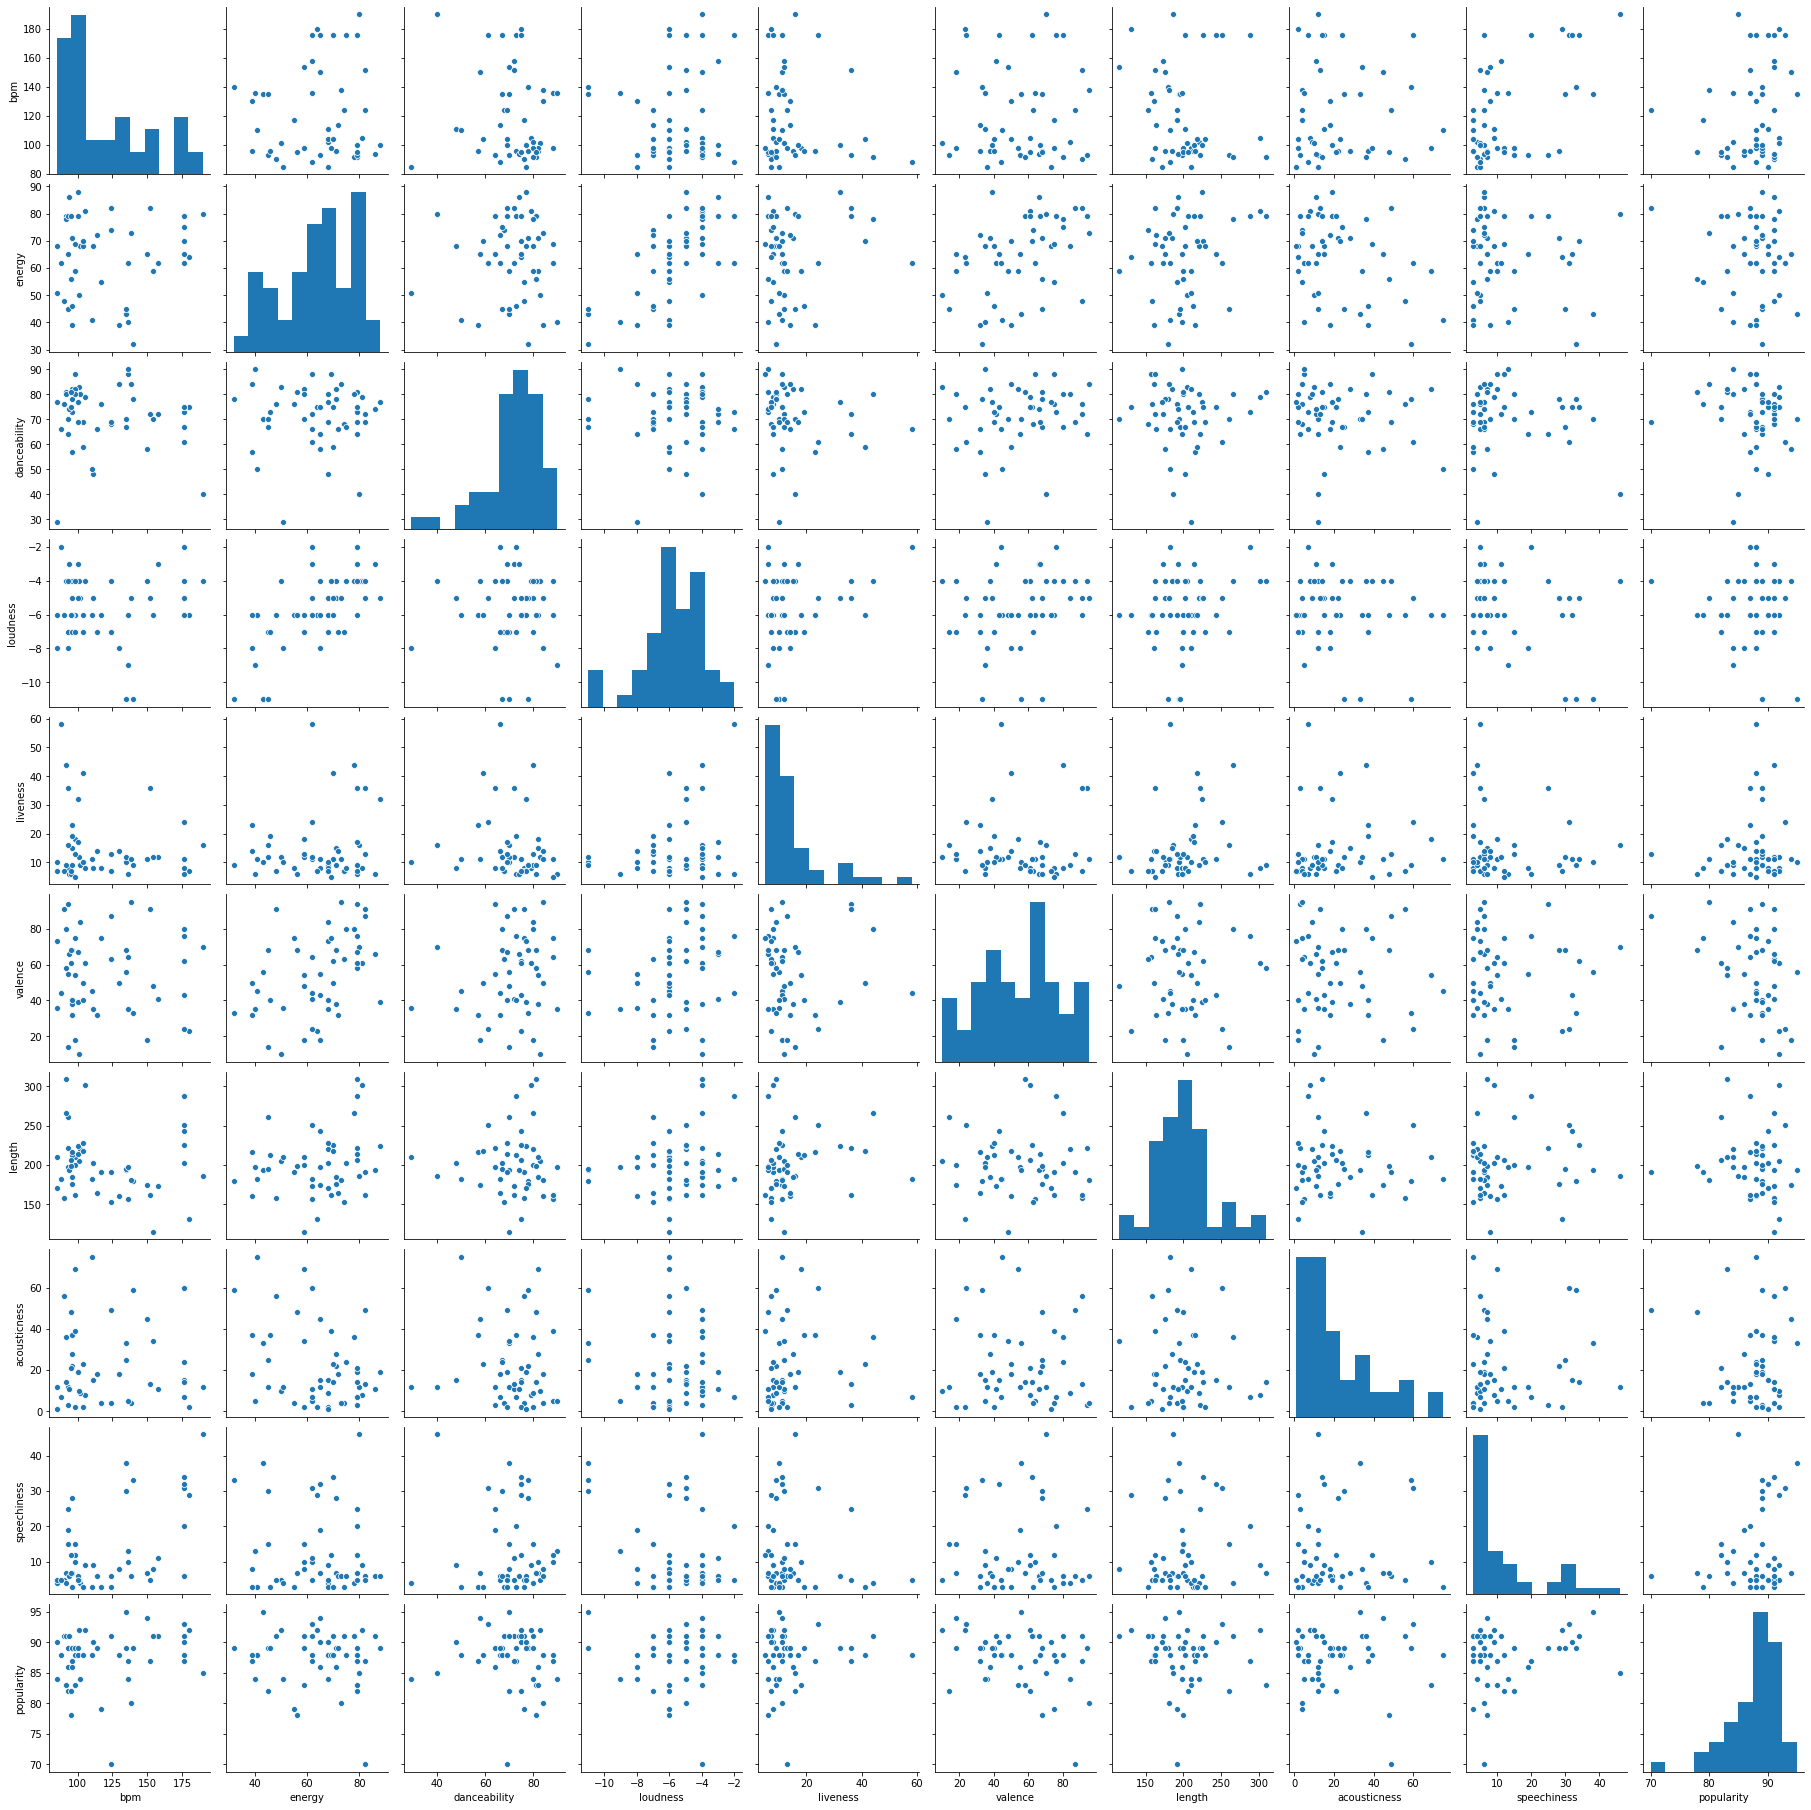

In [11]:
sns.pairplot(df)

Correlation between the loudness and the energy

Text(0.5, 1.0, 'Connection between the Loudness (dB) and Energy')

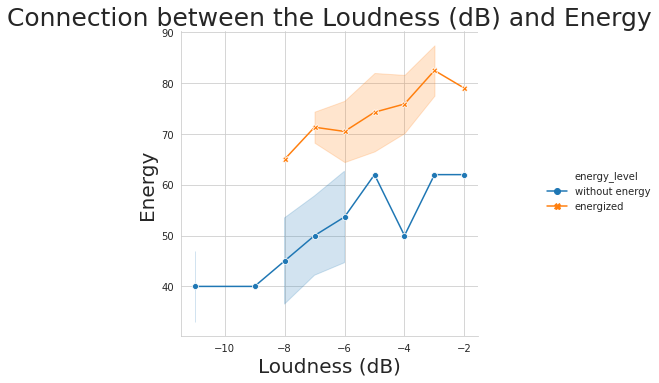

In [12]:
sns.set_style("whitegrid")
intensity = sum(df.energy)/len(df.energy)
df['energy_level'] = ['energized' if i > intensity else 'without energy' for i in df.energy]

sns.relplot(x='loudness', y='energy',data=df, kind='line', style='energy_level', hue='energy_level', markers=True, dashes=False, ci='sd')
plt.xlabel('Loudness (dB)', fontsize = 20)
plt.ylabel('Energy', fontsize = 20)
plt.title('Connection between the Loudness (dB) and Energy', fontsize = 25)
# from the plot the appropriate interpretation is loudness and energy were signifanlly correlated, because the more Loud the song the more Energetic the song.

Text(0.5, 1.0, 'Connection between the Loudness (dB) and Energy')

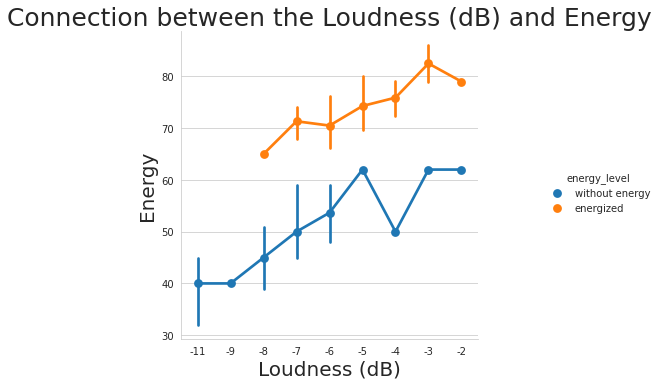

In [13]:
sns.catplot(x='loudness', y='energy',data=df, kind='point', hue='energy_level')
plt.xlabel('Loudness (dB)', fontsize = 20)
plt.ylabel('Energy', fontsize = 20)
plt.title('Connection between the Loudness (dB) and Energy', fontsize = 25)

# Regression between variables

* Linear Regression (Assuming the number variable affect the popularity point of the song)

In [14]:
# trainning dataset
independent_var = df[['bpm','energy','danceability','loudness','liveness','valence','length','acousticness','speechiness']]
dependent_var = df['popularity']

In [15]:
result = linear_model.LinearRegression()
result.fit(independent_var, dependent_var)

intercept = result.intercept_
reg_coef = result.coef_
print('Label: bpm(x1), energy(x2), danceability(x3), loudness(x4), liveness(x5), valence(x6), length(x7), acousticness(x8), speechiness(x9)')
print('\nIntercept value (a): %0.3f' % intercept)
print('\nRegression Equation: ŷ = %0.3f + %0.3f*X1 + %0.3f*X2 + %0.3f*X3 + %0.3f*X4, + %0.3f*X5, + %0.3f*X6, + %0.3f*X7, + %0.3f*X8, + %0.3f*X9' % (intercept, reg_coef[0], reg_coef[1], reg_coef[2], reg_coef[3], reg_coef[4], reg_coef[5], reg_coef[6], reg_coef[7], reg_coef[8]))

Label: bpm(x1), energy(x2), danceability(x3), loudness(x4), liveness(x5), valence(x6), length(x7), acousticness(x8), speechiness(x9)

Intercept value (a): 90.522

Regression Equation: ŷ = 90.522 + 0.010*X1 + 0.015*X2 + 0.013*X3 + 0.130*X4, + 0.056*X5, + -0.071*X6, + -0.016*X7, + -0.009*X8, + 0.093*X9


* Linear Regression using OLS Regression from stastsmodels

In [16]:
x_var = sm.add_constant(independent_var)
model = sm.OLS(dependent_var, x_var).fit()
predictions = model.predict(x_var)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.096
Date:                Thu, 14 May 2020   Prob (F-statistic):              0.387
Time:                        21:06:56   Log-Likelihood:                -140.04
No. Observations:                  50   AIC:                             300.1
Df Residuals:                      40   BIC:                             319.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           90.5225      9.577      9.453   

From the result above the **Coefficient Determination** or **R-squared** is **0.198** or **19.8%** and from the p-value column we can see that the all value are higher than 0.05 which is the variables are not having correlation with the **Popularity**. 
With that we can conclude that the **Song Popularity** point is not affected by the independent variable, because the given variables only affect **19.8%** of the **Popularity** point and the **80.4%** of the other significant factors remain unknown.

# Class Classification using KNN

* Preparation

In [17]:
X = df[['bpm','energy','danceability','loudness','liveness','valence','length','acousticness','speechiness']]
y = df['genre']
knn = KNeighborsClassifier(n_neighbors=6)

In [18]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [19]:
X.shape

(50, 9)

In [20]:
y.shape

(50,)

In [21]:
predict = knn.predict(X)
pd.Series(predict).value_counts()

pop                 9
dance pop           8
latin               5
big room            5
canadian hip hop    4
electropop          4
boy band            4
edm                 3
canadian pop        2
reggaeton flow      2
country rap         2
panamanian pop      1
atl hip hop         1
dtype: int64

* Testing the classification model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
knn = KNeighborsClassifier(n_neighbors=20)

In [23]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['dance pop' 'pop' 'pop' 'pop' 'dance pop' 'latin' 'dance pop' 'pop' 'pop'
 'dance pop' 'dance pop' 'pop' 'latin' 'dance pop' 'dance pop']


In [24]:
knn.score(X_test, y_test)

0.13333333333333333

# Conclusion
From the score above we know that the classification algorithm accuracy is around **13,3%** with the nearest neighbors of **20**, which mean the classification with the given data from the dataset can't give strong prediction from the new data entered in the future.
The conclusion of the result is the same as the conclusion of the regression test before, because there are no correlation between the independent variable or data with the targeted class name (Genres).

# Thank you!